# Prédiction du nombre des rendez-vous

### Importer les bibliothèques


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt

### importation des données

In [62]:
rdv = pd.read_excel("rdv-1.xlsx")   

rdv

,_id,idPatient,idDocteur,Etat,date,Day,Date_1,iddoc,idpat,article
0,60085df2fc13ae5e5b000000,60059455fc13ae5e170002b1,600846139f61308d1c177f09,1,2020-11-01,1112020,2020-11-01,9518,690,46
1,60085df2fc13ae5e5b000002,60059455fc13ae5e170002cb,6008478b9f61308d1c17868b,1,2020-12-12,12122020,2020-12-12,6131,716,21
2,60085df2fc13ae5e5b00000c,60059454fc13ae5e170000d4,60084cc09f61308d1c179733,1,2020-10-31,31102020,2020-10-31,2195,213,35
3,60085df2fc13ae5e5b00000e,60059455fc13ae5e1700028d,600846129f61308d1c1779c6,1,2020-12-12,12122020,2020-12-12,8171,654,51
4,60085df2fc13ae5e5b000013,60059455fc13ae5e17000160,600845cf9f61308d1c1777ea,1,2020-08-31,31082020,2020-08-31,10615,353,6
...,...,...,...,...,...,...,...,...,...,...
832,60085e81fc13ae16bb0007a4,60059455fc13ae5e17000203,600840020298b5a02cec881a,1,2020-08-03,3082020,2020-08-03,16678,516,1
833,60085e81fc13ae16bb0007a5,60059455fc13ae5e170001be,60084db49f61308d1c179d18,1,2020-11-11,11112020,2020-11-11,1184,447,1
834,60085e81fc13ae16bb0007c7,60059455fc13ae5e1700021b,600840010298b5a02cec81a1,1,2020-10-29,29102020,2020-10-29,15021,540,1
835,60085e81fc13ae16bb0007c9,60059454fc13ae5e17000053,6008478b9f61308d1c17881f,1,2021-01-05,5012021,2021-01-05,6535,84,1


### Nettoyer les données


In [63]:
rdv.dropna(axis=1, how='all', inplace=True)
rdv.dropna(axis=0, how='all', inplace=True)

### Modélisation

In [64]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [67]:
rdv

,_id,idPatient,idDocteur,Etat,date,Day,Date_1,iddoc,idpat,article
0,60085df2fc13ae5e5b000000,60059455fc13ae5e170002b1,600846139f61308d1c177f09,1,2020-11-01,1112020,2020-11-01,9518,690,46
1,60085df2fc13ae5e5b000002,60059455fc13ae5e170002cb,6008478b9f61308d1c17868b,1,2020-12-12,12122020,2020-12-12,6131,716,21
2,60085df2fc13ae5e5b00000c,60059454fc13ae5e170000d4,60084cc09f61308d1c179733,1,2020-10-31,31102020,2020-10-31,2195,213,35
3,60085df2fc13ae5e5b00000e,60059455fc13ae5e1700028d,600846129f61308d1c1779c6,1,2020-12-12,12122020,2020-12-12,8171,654,51
4,60085df2fc13ae5e5b000013,60059455fc13ae5e17000160,600845cf9f61308d1c1777ea,1,2020-08-31,31082020,2020-08-31,10615,353,6
...,...,...,...,...,...,...,...,...,...,...
832,60085e81fc13ae16bb0007a4,60059455fc13ae5e17000203,600840020298b5a02cec881a,1,2020-08-03,3082020,2020-08-03,16678,516,1
833,60085e81fc13ae16bb0007a5,60059455fc13ae5e170001be,60084db49f61308d1c179d18,1,2020-11-11,11112020,2020-11-11,1184,447,1
834,60085e81fc13ae16bb0007c7,60059455fc13ae5e1700021b,600840010298b5a02cec81a1,1,2020-10-29,29102020,2020-10-29,15021,540,1
835,60085e81fc13ae16bb0007c9,60059454fc13ae5e17000053,6008478b9f61308d1c17881f,1,2021-01-05,5012021,2021-01-05,6535,84,1


In [69]:
tab1=pd.crosstab( rdv.date,rdv.Etat)
tab1

Etat,1
date,
2020-01-08,1
2020-01-18,1
2020-01-19,2
2020-01-20,1
2020-01-27,1
...,...
2021-01-15,2
2021-01-16,4
2021-01-17,7


In [70]:
tab1

Etat,1
date,
2020-01-08,1
2020-01-18,1
2020-01-19,2
2020-01-20,1
2020-01-27,1
...,...
2021-01-15,2
2021-01-16,4
2021-01-17,7


In [71]:
def positive_average(num):
    return num[num > -200].mean()
    
daily_data =tab1.apply(positive_average)
daily_data.head()

Etat
1    2.968085
dtype: float64

In [72]:
daily_data

Etat
1    2.968085
dtype: float64

In [73]:
weekly_data = tab1.resample('W').mean()
weekly_data = weekly_data.dropna()
weekly_data.head()

Etat,1
date,
2020-01-12,1.0
2020-01-19,1.5
2020-01-26,1.0
2020-02-02,1.0
2020-02-16,1.0


In [74]:
df = tab1.reset_index()
df.columns = ['ds','y']
df

,ds,y
0,2020-01-08,1
1,2020-01-18,1
2,2020-01-19,2
3,2020-01-20,1
4,2020-01-27,1
...,...,...
277,2021-01-15,2
278,2021-01-16,4
279,2021-01-17,7
280,2021-01-18,2


In [75]:
prediction_size = 12
train_df = df[:-prediction_size]

In [76]:
m = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=732)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-08,0.915638,-1.418124,2.660492,0.915638,0.915638,-0.383122,-0.383122,-0.383122,-0.334206,...,0.078147,0.078147,0.078147,-0.127063,-0.127063,-0.127063,0.0,0.0,0.0,0.532516
1,2020-01-18,1.022433,-1.177011,2.901395,1.022433,1.022433,-0.092627,-0.092627,-0.092627,-0.334206,...,-0.075874,-0.075874,-0.075874,0.317454,0.317454,0.317454,0.0,0.0,0.0,0.929807
2,2020-01-19,1.033113,-0.756805,3.502289,1.033113,1.033113,0.352399,0.352399,0.352399,-0.334206,...,0.335126,0.335126,0.335126,0.351479,0.351479,0.351479,0.0,0.0,0.0,1.385512
3,2020-01-20,1.043792,-1.069709,3.081449,1.043792,1.043792,-0.028738,-0.028738,-0.028738,-0.334206,...,-0.076490,-0.076490,-0.076490,0.381958,0.381958,0.381958,0.0,0.0,0.0,1.015054
4,2020-01-27,1.118549,-0.723665,3.228016,1.118549,1.118549,0.075127,0.075127,0.075127,-0.334206,...,-0.076490,-0.076490,-0.076490,0.485823,0.485823,0.485823,0.0,0.0,0.0,1.193675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,2023-01-17,12.710849,10.439239,14.664525,12.709683,12.712107,-0.167016,-0.167016,-0.167016,-0.334206,...,-0.122589,-0.122589,-0.122589,0.289779,0.289779,0.289779,0.0,0.0,0.0,12.543833
1010,2023-01-18,12.721522,10.764847,14.756614,12.720354,12.722783,0.070219,0.070219,0.070219,-0.334206,...,0.078147,0.078147,0.078147,0.326278,0.326278,0.326278,0.0,0.0,0.0,12.791741
1011,2023-01-19,12.732196,10.832341,14.740437,12.731024,12.733459,0.055171,0.055171,0.055171,-0.334206,...,0.029936,0.029936,0.029936,0.359441,0.359441,0.359441,0.0,0.0,0.0,12.787366
1012,2023-01-20,12.742869,10.673389,14.562691,12.741694,12.744136,-0.113466,-0.113466,-0.113466,-0.334206,...,-0.168257,-0.168257,-0.168257,0.388997,0.388997,0.388997,0.0,0.0,0.0,12.629403


L'objet de prévision est un dataframe avec une colonne yhat contenant la prévision. Il comporte des colonnes supplémentaires pour les intervalles d'incertitude et les composantes saisonnières.

In [77]:
future

,ds
0,2020-01-08
1,2020-01-18
2,2020-01-19
3,2020-01-20
4,2020-01-27
...,...
1009,2023-01-17
1010,2023-01-18
1011,2023-01-19
1012,2023-01-20


### Automatic changepoint detection in Prophet

Prophet détecte les points de changement 
Par défaut, Prophet spécifie 25 points de changement potentiels qui sont uniformément placés dans les premiers 80% de la série chronologique. Les lignes verticales de cette figure indiquent où les points de changement potentiels ont été placés:


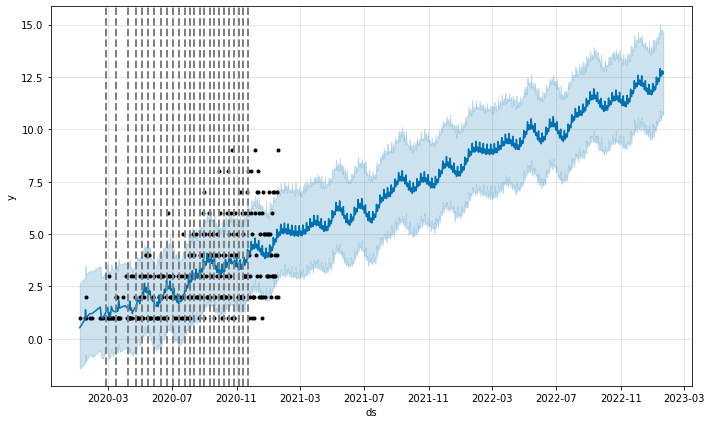

In [78]:
fig=m.plot(forecast) 
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

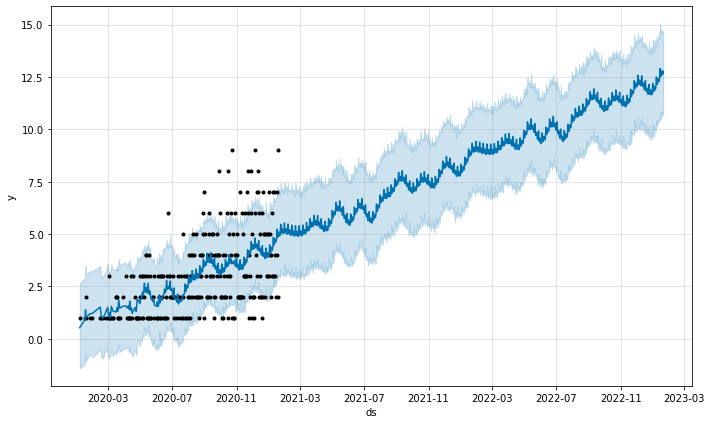

In [79]:
fig = m.plot(forecast)


# les composants de prévision:
# la tendance, la saisonnalité annuelle et la saisonnalité hebdomadaire de la série chronologique


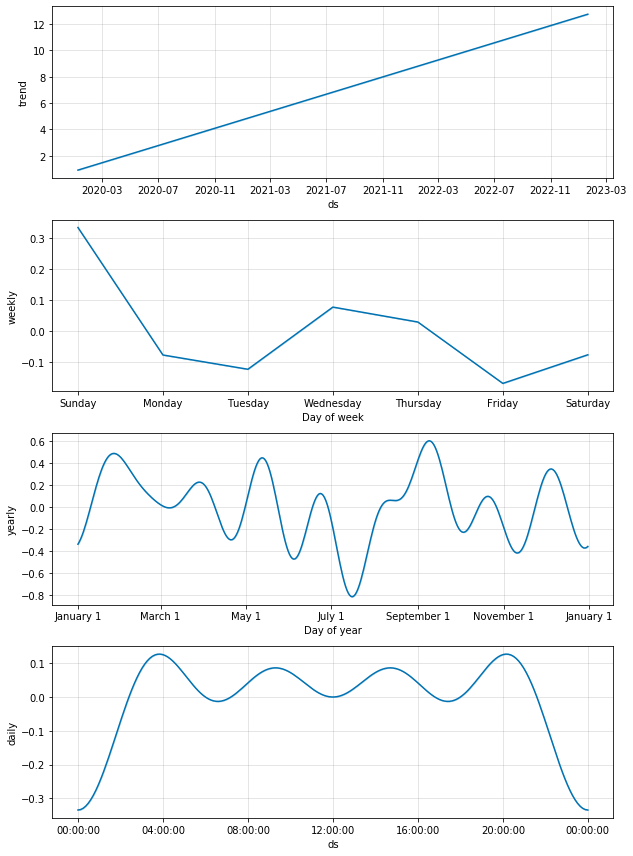

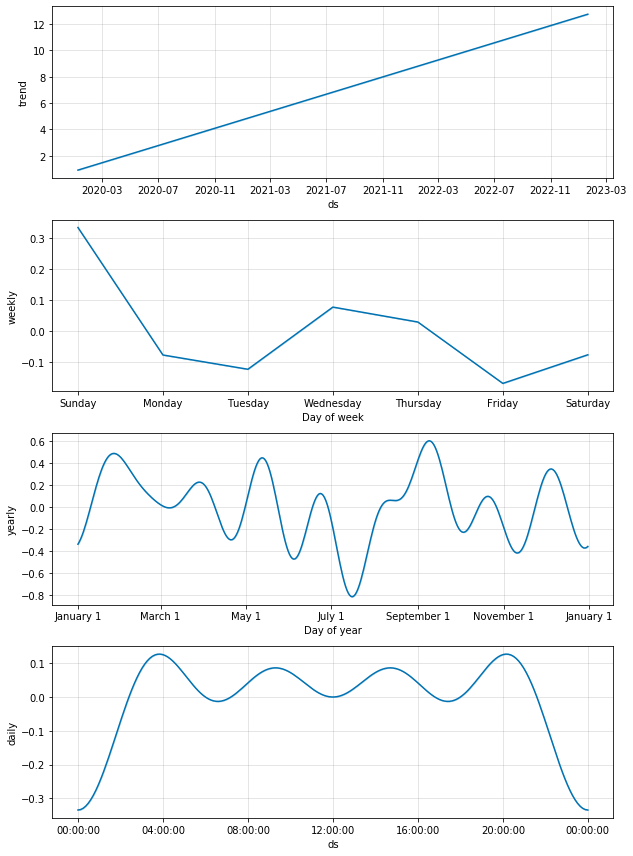

In [80]:
m.plot_components(forecast)


In [82]:
# Définit une fonction qui crée un DataFrame contenant les prédictions et valeurs actuelles
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(df, forecast)
# Définit une fonction qui calcule MAPE et MAE
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}
# Affiche MAPE et MAE
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE nan
MAE nan


#### la prévision avec ses limites supérieure et inférieure:# a prévision avec ses limites supérieure et inférieure:

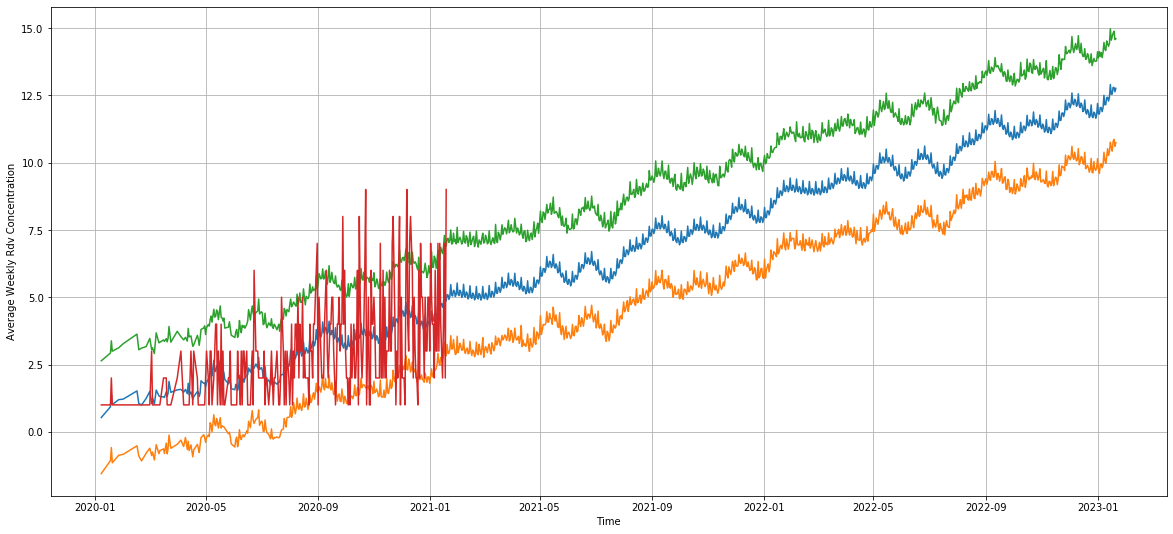

In [53]:
plt.figure(figsize=(20, 9))
plt.plot(cmp_df['yhat'],label = "Average of appointements")
plt.plot(cmp_df['yhat_lower'],label = "Lowest number of appointements")
plt.plot(cmp_df['yhat_upper'],label = "Highest number of appointements")
plt.plot((cmp_df['y']),label = "Predicted number of appointements")
plt.xlabel('Time')
plt.ylabel('Average Weekly Rdv Concentration')
plt.grid(True)
plt.legend()
plt.show()